<a href="https://colab.research.google.com/github/h-neal/Matt-Macarty-Algorithmic-Trading-Youtube-Series/blob/main/3_Alphavantage_Intraday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alphavantage Intraday**

- API for "real time" stock data
- Freemium model - sign up for free account to get API key
- Can make API calls directly or install the helper library: pip install alpha_vantage from the command line

https://alphavantage.co

**1. Set up Environment**

In [2]:
!pip install alpha_vantage

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

**2. Store API Key**

In [8]:
from google.colab import drive
drive.mount('/content/drive')
# Ensure the path is correct and the file exists in your Google Drive
key = open('/content/drive/My Drive/Matt Macarty Algorithmic Trading Youtube Series/l-alphavantage.txt').read()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3. Create TimeSeries Object and Make API Call**

In [9]:
ts = TimeSeries(key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='TSLA', interval='1min', outputsize='full')

**4. Examine Data**

In [11]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2025-05-09 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20160 entries, 2025-05-09 19:59:00 to 2025-04-10 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    20160 non-null  float64
 1   2. high    20160 non-null  float64
 2   3. low     20160 non-null  float64
 3   4. close   20160 non-null  float64
 4   5. volume  20160 non-null  float64
dtypes: float64(5)
memory usage: 945.0 KB


In [13]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-05-09 19:59:00,299.299,299.35,299.25,299.3000,13773.0
2025-05-09 19:58:00,299.170,299.30,299.14,299.2991,8581.0
2025-05-09 19:57:00,299.200,299.20,299.11,299.1800,3829.0
2025-05-09 19:56:00,299.100,299.20,299.04,299.2000,6246.0
2025-05-09 19:55:00,299.130,299.15,299.01,299.1000,11494.0


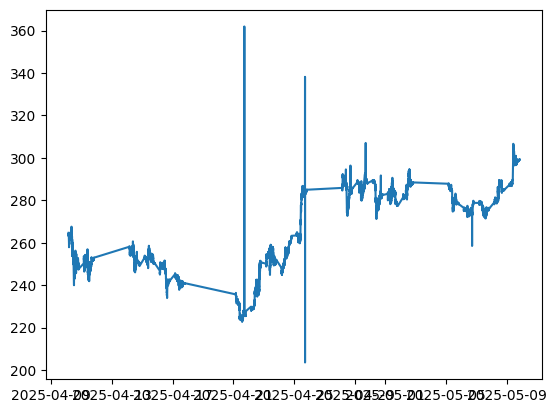

In [14]:
plt.plot(data['4. close'])

**5. Rename Columns and Add Separate Date and Time Columns**

In [15]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [16]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [21]:
data.loc['2025-05-09']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2025-05-09 19:59:00,299.299,299.35,299.25,299.3000,13773.0,2025-05-09,19:59:00
2025-05-09 19:58:00,299.170,299.30,299.14,299.2991,8581.0,2025-05-09,19:58:00
2025-05-09 19:57:00,299.200,299.20,299.11,299.1800,3829.0,2025-05-09,19:57:00
2025-05-09 19:56:00,299.100,299.20,299.04,299.2000,6246.0,2025-05-09,19:56:00
2025-05-09 19:55:00,299.130,299.15,299.01,299.1000,11494.0,2025-05-09,19:55:00
...,...,...,...,...,...,...,...
2025-05-09 04:04:00,287.530,287.65,287.00,287.5000,13443.0,2025-05-09,04:04:00
2025-05-09 04:03:00,287.880,288.09,287.46,287.5000,10837.0,2025-05-09,04:03:00
2025-05-09 04:02:00,287.740,288.06,287.67,287.8800,14463.0,2025-05-09,04:02:00


In [22]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8211 entries, 2025-04-10 09:30:00 to 2025-05-09 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       8211 non-null   float64
 1   high       8211 non-null   float64
 2   low        8211 non-null   float64
 3   close      8211 non-null   float64
 4   volume     8211 non-null   float64
 5   TradeDate  8211 non-null   object 
 6   time       8211 non-null   object 
dtypes: float64(5), object(2)
memory usage: 513.2+ KB


In [25]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

<ipython-input-25-2d05c2296b73>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  market.groupby('TradeDate').agg({'low':min, 'high':max})
<ipython-input-25-2d05c2296b73>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  market.groupby('TradeDate').agg({'low':min, 'high':max})


,low,high
TradeDate,,
2025-04-10,239.3300,262.4900
2025-04-11,241.3629,257.7400
2025-04-14,245.9300,261.8000
2025-04-15,247.5400,258.7500
2025-04-16,233.8900,251.9700
2025-04-17,237.6833,244.3400
2025-04-21,222.7900,232.2100
2025-04-22,229.8501,242.7900
2025-04-23,244.4300,259.4499


In [27]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2025-04-10 12:27:00,241.4201,241.6493,239.3300,240.0000,722430.0,2025-04-10,12:27:00
2025-04-11 12:26:00,242.2500,242.3600,241.3629,241.9000,521397.0,2025-04-11,12:26:00
2025-04-14 12:57:00,246.6200,246.6200,245.9300,246.0722,313308.0,2025-04-14,12:57:00
2025-04-15 09:31:00,248.0400,248.8199,247.5400,248.0923,585101.0,2025-04-15,09:31:00
2025-04-16 15:26:00,234.1450,234.2800,233.8900,233.9701,445086.0,2025-04-16,15:26:00
2025-04-17 10:37:00,237.8600,238.2183,237.6833,238.0800,255718.0,2025-04-17,10:37:00
2025-04-21 13:55:00,222.8400,223.1700,222.7900,223.1200,183013.0,2025-04-21,13:55:00
2025-04-22 09:30:00,230.9600,231.6200,229.8501,230.3414,1266808.0,2025-04-22,09:30:00
2025-04-23 09:54:00,246.3300,246.9000,244.4300,245.4256,908331.0,2025-04-23,09:54:00


In [28]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2025-04-10 09:33:00,261.6050,262.4900,260.5200,260.7576,979317.0,2025-04-10,09:33:00
2025-04-11 09:46:00,255.2500,257.7400,255.2450,256.9400,899267.0,2025-04-11,09:46:00
2025-04-14 09:33:00,260.5400,261.8000,259.9200,260.2050,590744.0,2025-04-14,09:33:00
2025-04-15 10:44:00,258.6300,258.7500,257.9000,258.2129,568711.0,2025-04-15,10:44:00
2025-04-16 11:34:00,251.3221,251.9700,251.2900,251.6500,289189.0,2025-04-16,11:34:00
2025-04-17 09:51:00,243.8550,244.3400,243.6000,243.7599,570148.0,2025-04-17,09:51:00
2025-04-21 09:34:00,230.8400,232.2100,230.1500,231.6700,678669.0,2025-04-21,09:34:00
2025-04-22 12:24:00,242.1900,242.7900,242.1700,242.6500,352389.0,2025-04-22,12:24:00
2025-04-23 11:14:00,258.6600,259.4499,258.6600,259.0141,474499.0,2025-04-23,11:14:00
